# 14. COMPUTER VISION

# 14.2. Convolution and ReLU

# 14.2.1. COURS

In [1]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_14-COMPUTER_VISION/input')

# Feature Extraction

In [ ]:
# L'extraction de caractéristiques effectuée par la base consiste en trois 
# opérations de base :
# - Filtrer une image pour une caractéristique particulière (convolution)
# - Détecter cette caractéristique dans l'image filtrée (ReLU)
# - Condenser l'image pour en améliorer les caractéristiques (mise en commun 
#   maximale)

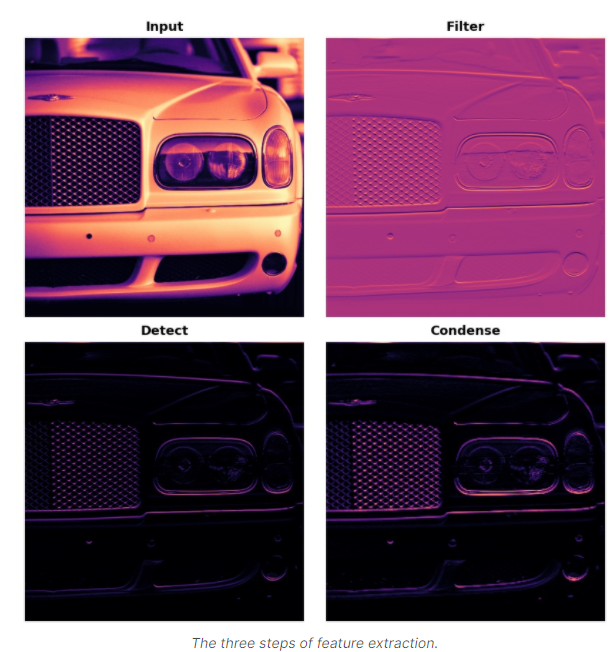

# Filter with Convolution

In [3]:
# Une couche convolutive effectue l'étape de filtrage. 

import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')
    # More layers follow
])

# Example - Apply Convolution and ReLU

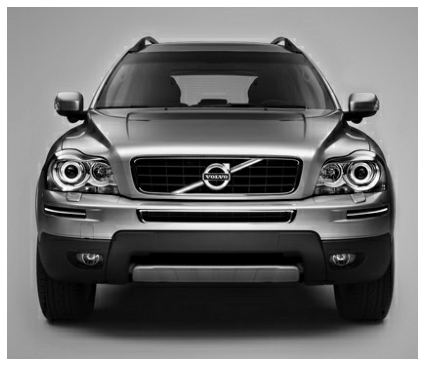

In [7]:
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'car.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

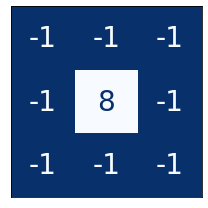

In [14]:
# Pour l'étape de filtrage, nous allons définir un noyau et l'appliquer avec la
# convolution. Dans ce cas, le noyau est un noyau de "détection de bord". 
import tensorflow as tf
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")
if module_path not in sys.path:
    sys.path.append(module_path)

from visiontools import show_kernel

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

In [16]:
# La prochaine cellule cachée effectue un reformatage pour rendre les choses 
# compatibles avec TensorFlow.

# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

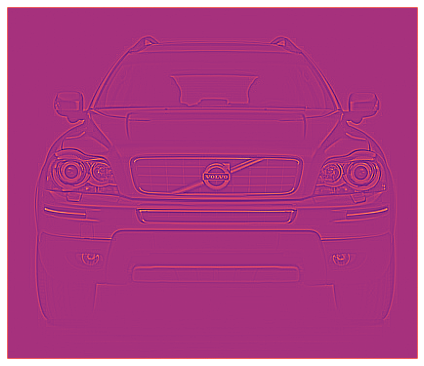

In [17]:
# appliquons notre noyau et voyons ce qui se passe.

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

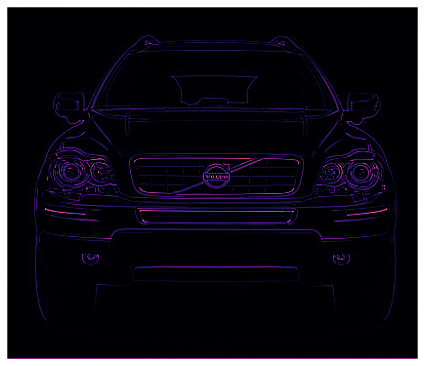

In [18]:
# Ensuite, il y a l'étape de détection avec la fonction ReLU. Cette fonction 
# est beaucoup plus simple que la convolution, car elle n'a pas de paramètres à
# définir.

image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

# 14.2.2. EXERCICES

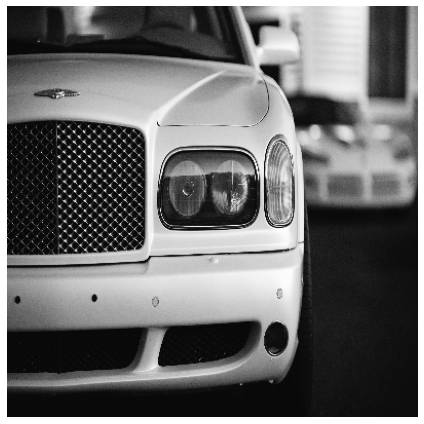

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show()

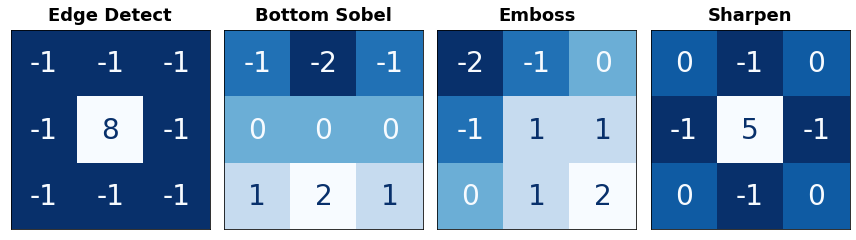

In [23]:
from visiontools import show_kernel, edge, bottom_sobel, emboss, sharpen


kernels = [edge, bottom_sobel, emboss, sharpen]
names = ["Edge Detect", "Bottom Sobel", "Emboss", "Sharpen"]

plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
    plt.subplot(1, 4, i+1)
    show_kernel(kernel)
    plt.title(name)
plt.tight_layout()

# Kernel Emboss

# 1) Define Kernel

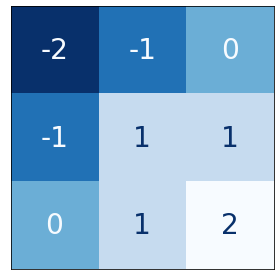

In [67]:
# YOUR CODE HERE: Define a kernel with 3 rows and 3 columns.
# kernel = tf.constant([
#     [-2, -1, 0],
#     [-1,  1, 1],
#     [0, 1, 2],
# ])
kernel=emboss
# Uncomment to view kernel
show_kernel(kernel)

In [68]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# 2) Apply Convolution

In [69]:
conv_fn = tf.nn.conv2d

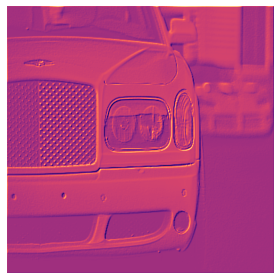

In [70]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

# Kernel Edge

# 1) Define Kernel

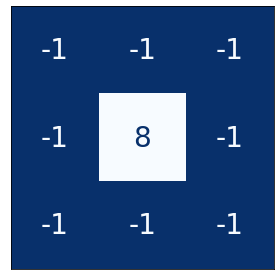

In [82]:
kernel1=edge
show_kernel(kernel1)

In [83]:
# Reformat for batch compatibility.
kernel1 = tf.reshape(kernel1, [*kernel1.shape, 1, 1])
kernel1 = tf.cast(kernel1, dtype=tf.float32)

# 2) Apply Convolution

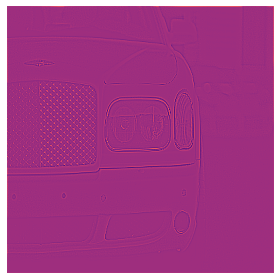

In [84]:
image_filter = conv_fn(
    input=image,
    filters=kernel1,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

# Kernel bottom_sobel

# 1) Define Kernel

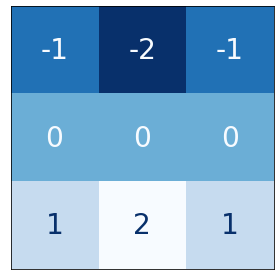

In [87]:
kernel2=bottom_sobel
show_kernel(kernel2)

In [90]:
# Reformat for batch compatibility.
kernel2 = tf.reshape(kernel2, [*kernel2.shape, 1, 1])
kernel2 = tf.cast(kernel2, dtype=tf.float32)

# 2) Apply Convolution

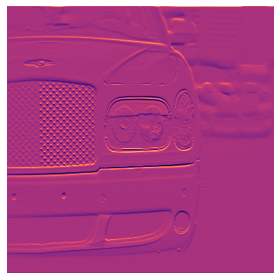

In [91]:
image_filter = conv_fn(
    input=image,
    filters=kernel2,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

# Kernel sharpen

# 1) Define Kernel

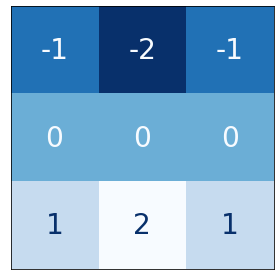

In [92]:
kernel3=bottom_sobel
show_kernel(kernel3)

In [93]:
# Reformat for batch compatibility.
kernel3 = tf.reshape(kernel3, [*kernel3.shape, 1, 1])
kernel3 = tf.cast(kernel3, dtype=tf.float32)

# 2) Apply Convolution

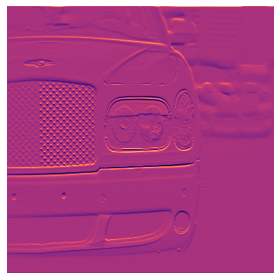

In [94]:
image_filter = conv_fn(
    input=image,
    filters=kernel3,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show()

# 3) Apply ReLU

In [95]:
relu_fn = tf.nn.relu

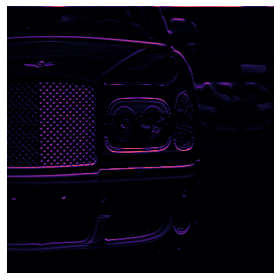

In [96]:
image_detect = relu_fn(image_filter)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.show();

# 4) Observe Convolution on a Numerical Matrix

In [97]:
# Sympy is a python library for symbolic mathematics. It has a nice
# pretty printer for matrices, which is all we'll use it for.
import sympy
sympy.init_printing()
from IPython.display import display

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))
# Reformat for Tensorflow
image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In [98]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
image_detect = tf.nn.relu(image_filter)

# The first matrix is the image after convolution, and the second is
# the image after ReLU.
display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))

⎡-2.0  2.0  0.0   0.0  0.0⎤
⎢                         ⎥
⎢-2.0  2.0  0.0   0.0  0.0⎥
⎢                         ⎥
⎢-2.0  2.0  0.0   0.0  0.0⎥
⎢                         ⎥
⎢-2.0  2.0  -1.0  0.0  0.0⎥
⎢                         ⎥
⎣-2.0  2.0  -1.0  0.0  0.0⎦

⎡0.0  2.0  0.0  0.0  0.0⎤
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎢0.0  2.0  0.0  0.0  0.0⎥
⎢                       ⎥
⎣0.0  2.0  0.0  0.0  0.0⎦